# DSLabs functions

In [155]:
%run "scripts/dslabs_functions.py"


# Data functions

In [156]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [168]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_agg_input.csv'


file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.75

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Checkouts                        427 non-null    float64
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             427 non-null    float64
 11  ARPPU                            427 non-null    float64
 12  Vie

# Differentiation - no diff

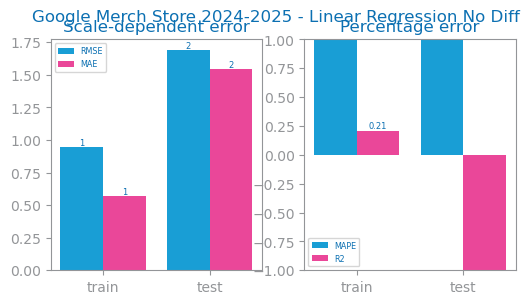

In [169]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Diff")
savefig(f"images/{file_tag}_linear_regression_eval_no_diff.png")

## no differentiating plot

<Axes: xlabel='Date', ylabel='Sessions'>

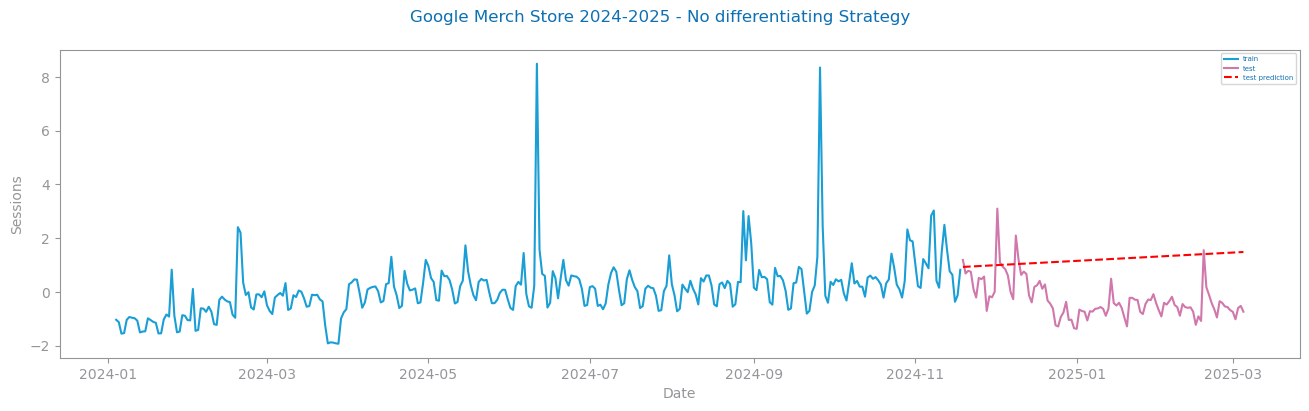

In [170]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No differentiating Strategy",
    xlabel='Date',
    ylabel=target,
)

# Differentiation 1

## Differentiation1 strategy Application

In [171]:

def apply_strategy_1(df):

    df_copy=df.copy()
    df_diff = df_copy.diff(periods=1).dropna()

    return df_diff


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,-0.088194,0.179972,0.053181,0.038567,0.106745,-0.012965,0.108239,1.148482,0.431125,0.597158,...,-0.194195,0.0,-0.055067,-0.209822,0.0,-0.018939,0.000000,0.000000,0.000000,0.0
2024-01-06,-0.427972,0.086816,0.025654,-0.980854,-0.613262,-0.356543,-0.692730,-1.705009,-0.963092,-1.417497,...,0.068540,0.0,-0.110134,-0.745231,0.0,-0.147722,0.000000,-0.719137,2.213594,0.0
2024-01-07,0.018567,0.091777,0.027120,0.914553,0.094187,0.045378,0.173182,-0.261239,0.026901,-0.374955,...,0.000000,0.0,0.004236,0.028941,0.0,0.018939,0.000000,0.000000,0.000000,0.0
2024-01-08,0.496671,0.184106,0.054402,-0.674797,0.228142,0.110204,0.129887,0.255106,0.147260,1.098902,...,-0.011423,0.0,0.152494,0.969524,0.0,0.170448,0.000000,0.000000,-2.213594,0.0
2024-01-09,0.103976,0.210840,0.062302,0.582441,0.150699,0.356543,0.346365,1.206299,0.623527,0.172979,...,0.079963,0.0,-0.084719,-0.151940,0.0,-0.015151,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.065913,-0.010749,-0.003421,-1.329357,-0.366283,-0.544538,-0.519547,-0.594537,-0.537719,-2.326312,...,-0.536893,0.0,-0.097427,-1.027406,0.0,-0.428014,0.951685,0.719137,2.213594,0.0
2025-03-02,-0.274793,-0.014883,-0.007330,0.819127,0.037675,0.129652,0.216478,-0.269107,0.096113,1.830811,...,0.319851,0.0,0.025416,0.303881,0.0,-0.026514,0.000000,0.000000,0.000000,0.0
2025-03-03,0.416832,-0.067799,-0.020849,1.042124,0.391399,0.570469,0.238126,0.954980,0.408068,1.148464,...,0.525470,0.0,0.131314,1.121465,0.0,0.564373,0.000000,0.000000,-2.213594,0.0


## Differentiation evaluate

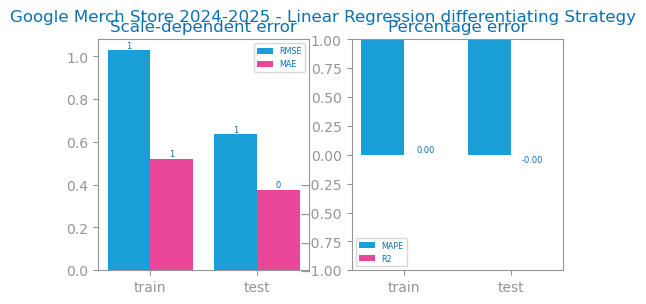

In [172]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression differentiating Strategy")
savefig(f"images/{file_tag}_linear_regression_diff1.png")

## Differentiation1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

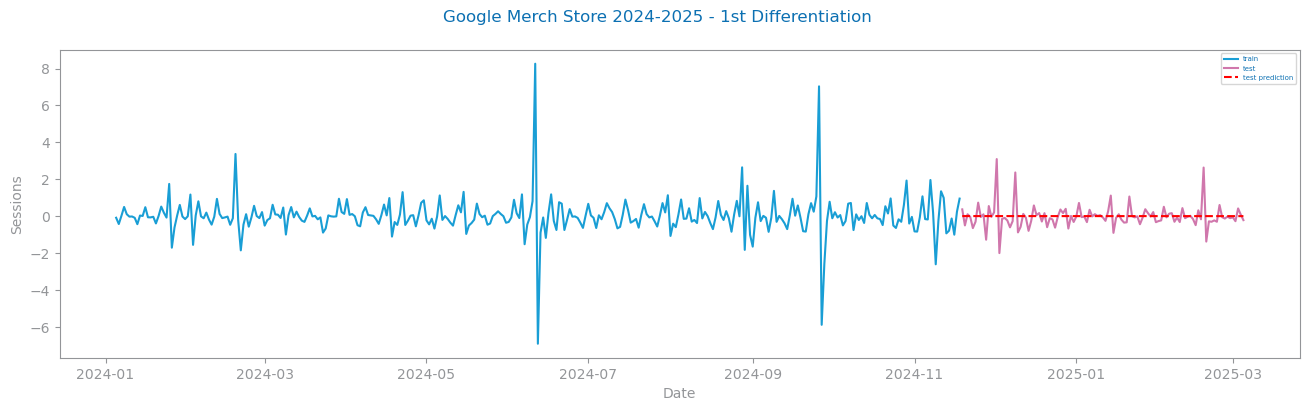

In [173]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - 1st Differentiation ",
    xlabel='Date',
    ylabel=target,
)

# Differentiation 2 

# Differentiation 2 Strategy Application

In [174]:

def apply_strategy_2(df):

    df_copy=df.copy()
    df_diff = df_copy.diff(periods=2).dropna()

    return df_diff


data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

data_2

,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-06,-0.516166,0.266788,0.078834,-0.942287,-0.506517,-0.369508,-0.584491,-0.556527,-0.531967,-0.820339,...,-0.125656,0.0,-0.165202,-0.955054,0.0,-0.166660,0.000000,-0.719137,2.213594,0.0
2024-01-07,-0.409405,0.178594,0.052773,-0.066301,-0.519075,-0.311165,-0.519547,-1.966249,-0.936192,-1.792452,...,0.068540,0.0,-0.105898,-0.716290,0.0,-0.128783,0.000000,-0.719137,2.213594,0.0
2024-01-08,0.515238,0.275883,0.081522,0.239756,0.322329,0.155582,0.303069,-0.006133,0.174160,0.723947,...,-0.011423,0.0,0.156730,0.998465,0.0,0.189387,0.000000,0.000000,-2.213594,0.0
2024-01-09,0.600647,0.394946,0.116704,-0.092355,0.378841,0.466747,0.476252,1.461405,0.770787,1.271881,...,0.068540,0.0,0.067775,0.817584,0.0,0.155297,0.000000,0.000000,-2.213594,0.0
2024-01-10,0.076125,0.406797,0.120206,0.192450,0.108838,0.252821,0.151535,-0.252624,0.044270,0.116012,...,0.000000,0.0,-0.067775,0.166411,0.0,-0.087118,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.176388,-0.079099,-0.008796,-1.852916,-0.429074,-0.453782,-0.216478,-0.447883,-0.232114,-2.456046,...,-0.399814,0.0,-0.131314,-1.280640,0.0,-0.609826,0.951685,0.719137,2.213594,0.0
2025-03-02,-0.340707,-0.025632,-0.010750,-0.510230,-0.328608,-0.414886,-0.303069,-0.863644,-0.441606,-0.495500,...,-0.217042,0.0,-0.072011,-0.723526,0.0,-0.454529,0.951685,0.719137,2.213594,0.0
2025-03-03,0.142039,-0.082682,-0.028178,1.861251,0.429074,0.700121,0.454604,0.685873,0.504181,2.979276,...,0.845321,0.0,0.156730,1.425345,0.0,0.537859,0.000000,0.000000,-2.213594,0.0


## Differentation 2 evaluate

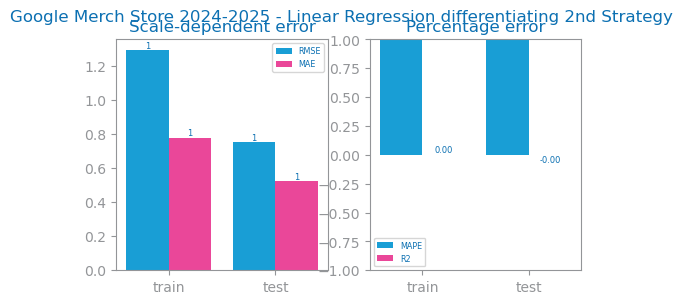

In [175]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_2.index).intersection(set(test_2.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()


# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression differentiating 2nd Strategy")
savefig(f"images/{file_tag}_linear_regression_diff2.png")

## Differentiation 2 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

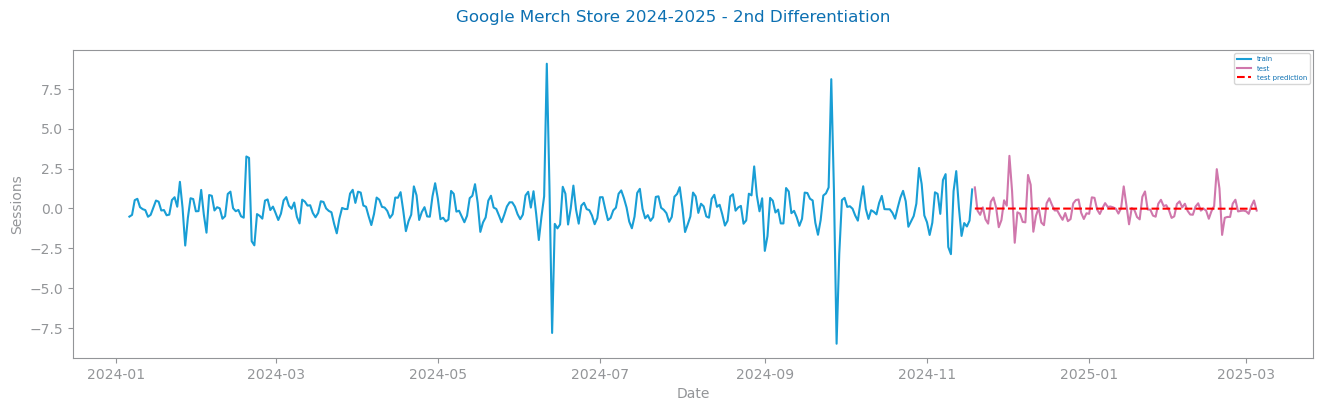

In [176]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - 2nd Differentiation",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Differentiation", "1st Differentiation", "2nd Differentiation"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2),

    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2),
        
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False),
        
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2),
        
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2),
        
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                 Model       MAE       MSE      RMSE        R²          MAPE
0   No Differentiation  1.545052  2.849846  1.688149 -4.312035  1.505579e+03
1  1st Differentiation  0.376257  0.403075  0.634882 -0.000632  6.226846e+06
2  2nd Differentiation  0.524638  0.569707  0.754790 -0.000138  1.023934e+02


# save to csv

In [178]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)
    
        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_diff_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sess